In [73]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from wordcloud import WordCloud
import nltk

In [74]:
%matplotlib inline
sns.set_theme(style="dark")
mpl.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns',None)
plt.style.use('seaborn-dark-palette')
plt.style.use('dark_background')

In [75]:
df = pd.read_csv('/content/Data_Science_Fields_Salary_Categorization.csv')
df.drop(df[['Unnamed: 0']],axis=1, inplace=True)

In [76]:
df

,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
0,2020,Data Scientist,MI,FT,"6,352,272.00",DE,DE,L,0
1,2020,Machine Learning Scientist,SE,FT,"20,688,070.00",JP,JP,S,0
2,2020,Big Data Engineer,SE,FT,"8,674,985.00",GB,GB,M,50
3,2020,Product Data Analyst,MI,FT,"1,591,390.00",HN,HN,S,0
4,2020,Machine Learning Engineer,SE,FT,"11,935,425.00",US,US,L,50
...,...,...,...,...,...,...,...,...,...
602,2022,Data Engineer,SE,FT,"12,253,703.00",US,US,M,100
603,2022,Data Engineer,SE,FT,"10,025,757.00",US,US,M,100
604,2022,Data Analyst,SE,FT,"10,264,466.00",US,US,M,0
605,2022,Data Analyst,SE,FT,"11,935,425.00",US,US,M,100


In [77]:
print(df.shape)

(607, 9)


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Working_Year          607 non-null    int64 
 1   Designation           607 non-null    object
 2   Experience            607 non-null    object
 3   Employment_Status     607 non-null    object
 4   Salary_In_Rupees      607 non-null    object
 5   Employee_Location     607 non-null    object
 6   Company_Location      607 non-null    object
 7   Company_Size          607 non-null    object
 8   Remote_Working_Ratio  607 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 42.8+ KB


In [79]:
df.apply(lambda col: col.unique())


Working_Year                                           [2020, 2021, 2022]
Designation             [Data Scientist, Machine Learning Scientist, B...
Experience                                               [MI, SE, EN, EX]
Employment_Status                                        [FT, CT, PT, FL]
Salary_In_Rupees        [6,352,272.00, 20,688,070.00, 8,674,985.00, 1,...
Employee_Location       [DE, JP, GB, HN, US, HU, NZ, FR, IN, PK, PL, P...
Company_Location        [DE, JP, GB, HN, US, HU, NZ, FR, IN, PK, CN, G...
Company_Size                                                    [L, S, M]
Remote_Working_Ratio                                         [0, 50, 100]
dtype: object

In [80]:
top10_job_title = df['Designation'].value_counts()[:10]
fig = px.bar(y=top10_job_title.values, 
             x=top10_job_title.index, 
             color = top10_job_title.index,
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=top10_job_title.values,
             title= 'Top 10 Job Titles',
             template= 'plotly_dark')
fig.update_layout(
    xaxis_title="Job Titles",
    yaxis_title="count",
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

In [81]:
def Freq_df(cleanwordlist):
    Freq_dist_nltk = nltk.FreqDist(cleanwordlist)
    df_freq = pd.DataFrame.from_dict(Freq_dist_nltk, orient='index')
    df_freq.columns = ['Frequency']
    df_freq.index.name = 'Term'
    df_freq = df_freq.sort_values(by=['Frequency'],ascending=False)
    df_freq = df_freq.reset_index()
    return df_freq

def Word_Cloud(data, color_background, colormap, title):
    plt.figure(figsize = (20,15))
    wc = WordCloud(width=1200, 
               height=600, 
               max_words=50,
               colormap= colormap,
               max_font_size = 100,
               random_state=88, 
               background_color=color_background).generate_from_frequencies(data)
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

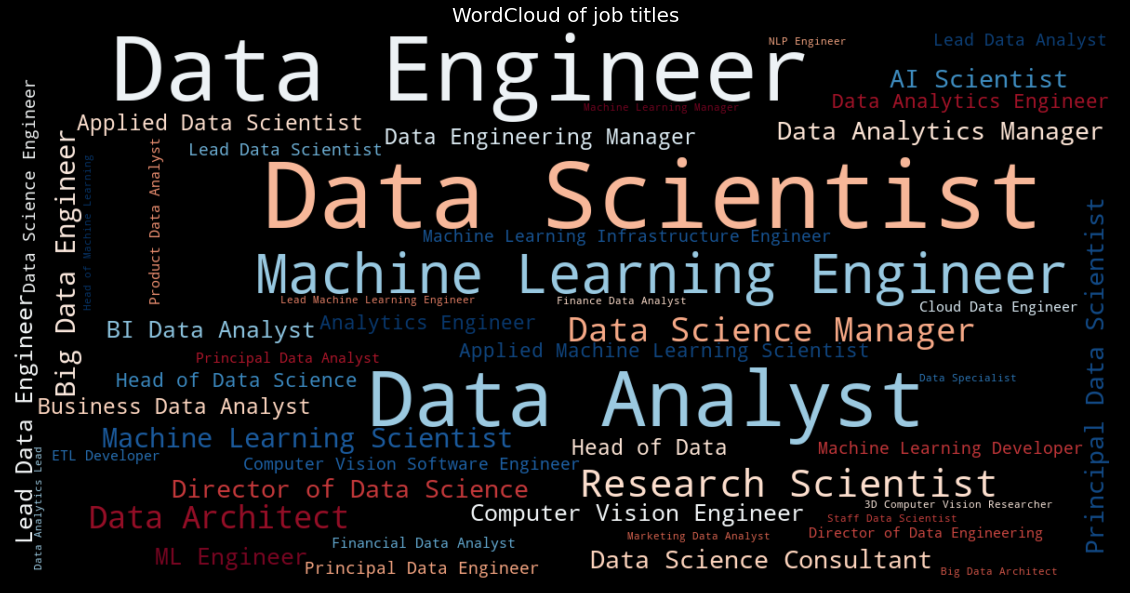

In [82]:
freq_df = Freq_df(df['Designation'].values.tolist())
data = dict(zip(freq_df['Term'].tolist(), freq_df['Frequency'].tolist()))
data = freq_df.set_index('Term').to_dict()['Frequency']

Word_Cloud(data ,'black','RdBu', 'WordCloud of job titles')

In [83]:
df['Experience'] = df['Experience'].replace('EN','Entry-level/Junior')
df['Experience'] = df['Experience'].replace('MI','Mid-level/Intermediate')
df['Experience'] = df['Experience'].replace('SE','Senior-level/Expert')
df['Experience'] = df['Experience'].replace('EX','Executive-level/Director')

ex_level = df['Experience'].value_counts()
fig = px.treemap(ex_level, 
                 path=[ex_level.index],
                 values=ex_level.values, 
                 title = 'Experience Level',
                 color=ex_level.index,
                 color_discrete_sequence=px.colors.sequential.PuBuGn,
                 template='plotly_dark',
#                  textinfo = "label+value+percent parent+percent entry+percent root",
                 width=1000, height=500)

percents = np.round((100*ex_level.values / sum(ex_level.values)).tolist(),2)
fig.data[0].customdata = [35.09, 46.13, 4.28 , 14.5]
fig.data[0].texttemplate = '%{label}<br>%{value}<br>%{customdata}%'

fig.update_layout(
    font=dict(size=19,family="Franklin Gothic"))

fig.show()

In [84]:
salary_job = df.groupby(['Salary_In_Rupees','Designation']).size().reset_index()
salary_job = salary_job[-20:]
fig = px.bar(x=salary_job['Designation'],y=salary_job['Salary_In_Rupees'],text = salary_job['Salary_In_Rupees'], 
                   color = salary_job['Salary_In_Rupees'], color_discrete_sequence=px.colors.sequential.PuBu)

fig.update_layout(
    xaxis_title="Designation",
    yaxis_title="Mean Salary ")
# fig.update_traces(width=0.9)
fig.update_layout(barmode = 'relative',xaxis_tickangle=-45, 
                  title='Top 20 Highest Salary by Job Title', template='plotly_dark',font = dict(size=17,family="Franklin Gothic"))

In [85]:
residence = df['Employee_Location'].value_counts()
top10_employee_location = residence[:10]
fig = px.bar(y=top10_employee_location.values, 
             x=top10_employee_location.index, 
             color = top10_employee_location.index,
             color_discrete_sequence=px.colors.sequential.deep,
             text=top10_employee_location.values,
             title= 'Top 10 Location of Employee',
             template= 'plotly_dark')
fig.update_layout(
    xaxis_title="Location of Employee",
    yaxis_title="count",
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

In [86]:
size = df['Company_Size'].value_counts()
top10_employee_location = size
fig = px.bar(y=top10_employee_location.values, 
             x=top10_employee_location.index, 
             color = top10_employee_location.index,
             color_discrete_sequence=px.colors.sequential.deep,
             text=top10_employee_location.values,
             title= 'Distribution of Company Size',
             template= 'plotly_dark')
fig.update_layout(
    xaxis_title="Company Size",
    yaxis_title="count",
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

In [87]:
remote_type = ['Fully Remote','Partially Remote','No Remote Work']

plt.figure(figsize=(20,5))
fig = px.bar(x = ['Fully Remote','Partially Remote','No Remote Work'], 
       y = df['Remote_Working_Ratio'].value_counts().values,
       color = remote_type,
       color_discrete_sequence=px.colors.sequential.dense,
       text=df['Remote_Working_Ratio'].value_counts().values,
       title = 'Remote Working Ratio Distribution',
       template='plotly_dark')

fig.update_traces(width=0.4)

fig.data[0].marker.line.width = 2


fig.update_layout(
    xaxis_title="Remote Type",
    yaxis_title="count",
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

<Figure size 1440x360 with 0 Axes>

In [88]:
remote_year = df.groupby(['Working_Year','Remote_Working_Ratio']).size()
ratio_2020 = np.round(remote_year[2020].values/remote_year[2020].values.sum(),2)
ratio_2021 = np.round(remote_year[2021].values/remote_year[2021].values.sum(),2)
ratio_2022 = np.round(remote_year[2022].values/remote_year[2022].values.sum(),2)
fig = go.Figure()
categories = ['No Remote Work', 'Partially Remote', 'Fully Remote']
fig.add_trace(go.Scatterpolar(
             r = ratio_2020, 
             theta = categories,
             fill = 'toself',
             name = '2020 remote ratio'
             ))
fig.add_trace(go.Scatterpolar(
             r = ratio_2021, 
             theta = categories,
             fill = 'toself',
             name = '2021 remote ratio'
#              fillcolor = 'lightred'
             ))
fig.add_trace(go.Scatterpolar(
             r = ratio_2022, 
             theta = categories,
             fill = 'toself',
             name = '2022 remote ratio'
#              fillcolor = 'lightblue'
             ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
#       visible=True,
      range=[0, 0.75]
    )),
  font = dict(family="Franklin Gothic", size=17),
  showlegend=True,
  title = 'Remote Ratio by Work Year'
)
fig.layout.template = 'plotly_dark'
fig.show()